In [1]:
# Importing all the necessary packages 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In C:\Users\abish\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\abish\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\abish\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\abish\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\abish\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df1=pd.read_excel(r'C:\Users\abish\Downloads\520\Project1\IEE520BMI555STUDENTFinalProject2020.xlsx',sheet_name="labeled")
df1.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
0,0,1,2,8,1,0,0,0,3,0,...,1027549,31,0,0,126,1.203939,4.81,7.25,10.02,0
1,1,12,0,2,0,0,0,0,3,3,...,400531,19,0,0,6,3.375939,3.61,6.58,4.98,0
2,0,0,0,3,2,0,1,0,0,3,...,608589,41,24153,0,126,2.972357,4.18,12.56,7.82,1
3,0,3,2,2,1,0,0,0,1,0,...,522208,28,0,0,63,2.506175,6.17,7.90,7.91,0
4,1,6,2,4,3,0,1,0,1,3,...,442829,35,0,0,110,1.121894,4.51,8.20,7.28,1


In [3]:
print('The shape of Dataset:', df1.shape)

The shape of Dataset: (10000, 23)


In [4]:
pd.DataFrame({'Unique_Values': df1.nunique(),'Data_Types':df1.dtypes})

,Unique_Values,Data_Types
x1,8,int64
x2,16,int64
x3,7,int64
x4,13,int64
x5,6,int64
x6,5,int64
x7,2,int64
x8,41,int64
x9,4,int64
x10,5,int64


In [6]:
def new_model():
    for column in df1:              
        df1[column].mask(df1[column].astype(object).eq('None')).fillna(df1[column].mode().index[0])
    return df1
df1 = new_model()
df1.head(20)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
0,0,1,2,8,1,0,0,0,3,0,...,1027549,31,0,0,126,1.203939,4.81,7.25,10.02,0
1,1,12,0,2,0,0,0,0,3,3,...,400531,19,0,0,6,3.375939,3.61,6.58,4.98,0
2,0,0,0,3,2,0,1,0,0,3,...,608589,41,24153,0,126,2.972357,4.18,12.56,7.82,1
3,0,3,2,2,1,0,0,0,1,0,...,522208,28,0,0,63,2.506175,6.17,7.90,7.91,0
4,1,6,2,4,3,0,1,0,1,3,...,442829,35,0,0,110,1.121894,4.51,8.20,7.28,1
5,0,0,4,2,3,0,1,0,3,2,...,421382,41,0,0,38,1.879496,5.57,12.39,9.98,0
6,0,3,0,9,2,0,1,0,1,4,...,293918,28,0,0,126,3.307213,5.58,10.90,9.84,0
7,0,0,0,3,2,0,1,0,2,3,...,579486,41,0,0,126,3.073179,5.39,10.34,5.61,1
8,1,7,0,8,2,0,1,0,1,3,...,337872,16,0,0,126,2.402650,5.18,11.40,5.83,0
9,4,3,1,6,3,0,1,0,2,3,...,523066,28,0,0,126,1.920709,5.50,8.50,8.26,1


In [7]:
df = df1.astype({'x1':'int64','x4':'int64','x8':'int64'})
print(df.dtypes) 

x1       int64
x2       int64
x3       int64
x4       int64
x5       int64
x6       int64
x7       int64
x8       int64
x9       int64
x10      int64
x11      int64
x12      int64
x13      int64
x14      int64
x15      int64
x16      int64
x17      int64
x18      int64
x19    float64
x20    float64
x21    float64
x22    float64
y        int64
dtype: object


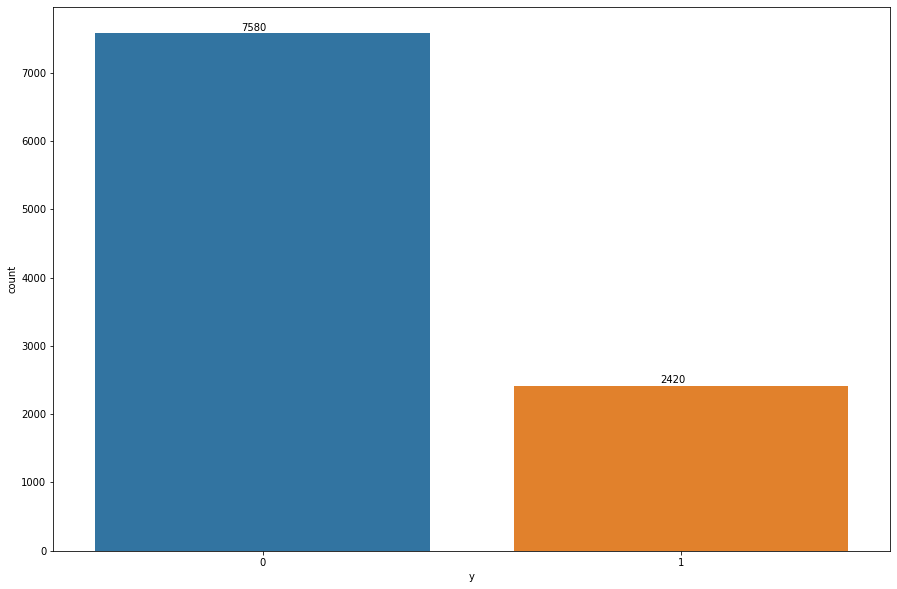

In [8]:
#Decision variable in the dataset is 'y', countplot of the decision variable
plt.figure(figsize=(15,10))
y_plot=sns.countplot(df.y)
#To show the count of the respective class on a barplot 
for q in y_plot.patches:
    y_plot.annotate(str(q.get_height()), (q.get_x()+0.35, q.get_height()+5), va='bottom', color='black')
plt.show()

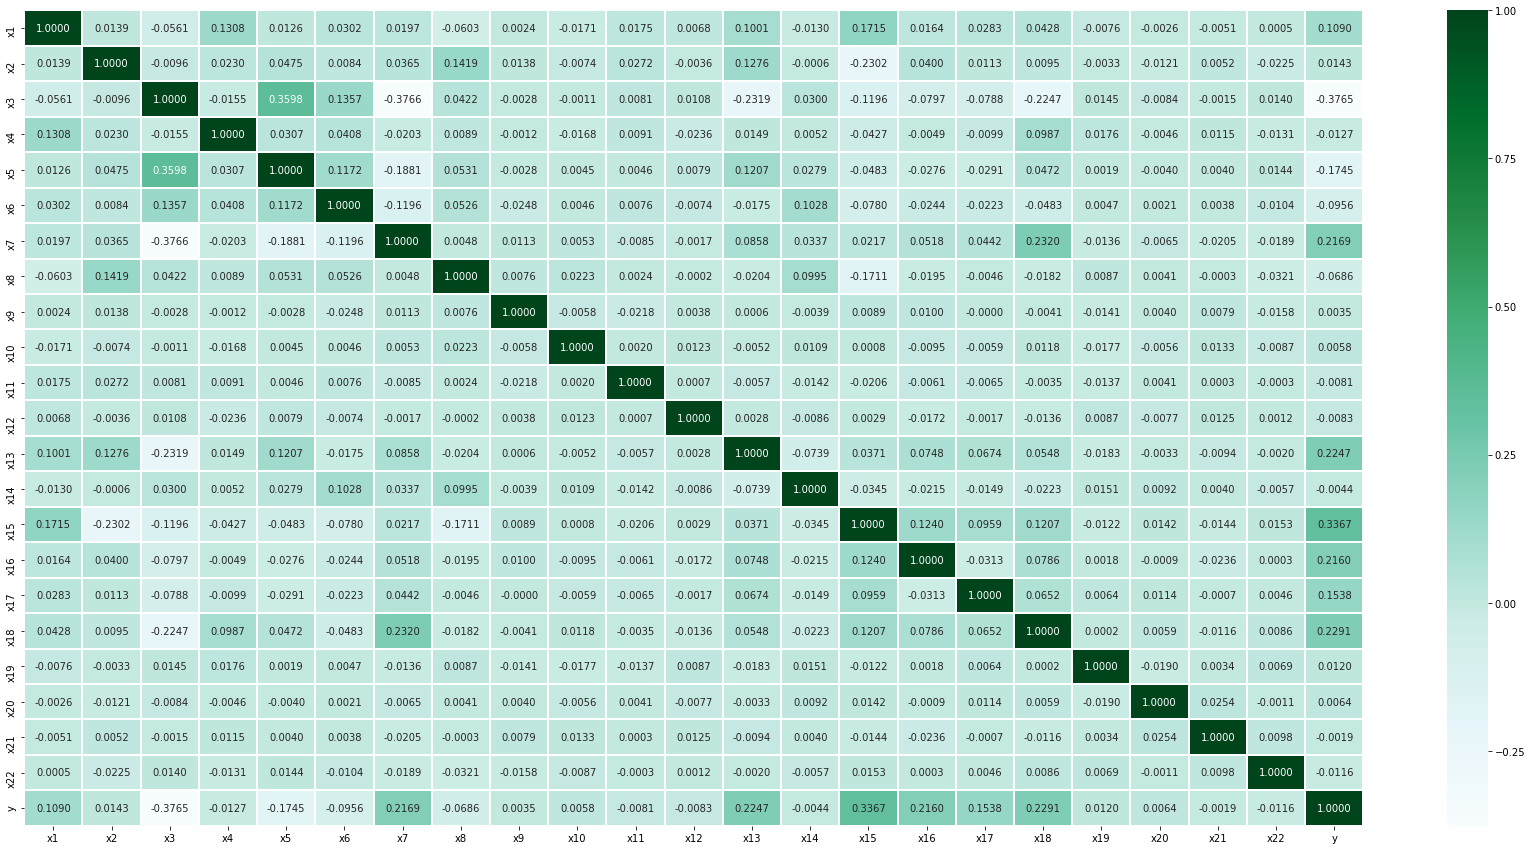

In [9]:
#Corelation Matrix
f,ax=plt.subplots(figsize=(30,15))
sns.heatmap(df.corr(), cmap = "BuGn", annot=True, linewidth=1, fmt='.4f', ax=ax)
plt.show()

In [40]:
#Assigning the X and y of the labeled data
X_original = df.loc[:, df.columns != 'y']
y_original =df.y

In [41]:
Scaler = StandardScaler()
X_original_scaled = Scaler.fit_transform(X_original)

In [42]:
X_original_scaled_train,X_original_scaled_test, y_original_train, y_original_test = train_test_split(X_original_scaled,y_original, test_size= 0.20, random_state=47)

In [59]:
#Class Imbalance  - Upsampled
def Balance(X,y):
    class_1 = X[y==1]
    class_0 = X[y==0]
    
    Class1_upsampled = resample(class_1, n_samples = len(class_0), replace=True, random_state=47)
    X = np.concatenate([class_0, Class1_upsampled])
    y=[1]*len(Class1_upsampled)+[0]*len(class_0)
    return X,y
X_resampled_train,y_resampled_train = Balance(X_original_scaled_train,y_original_train)


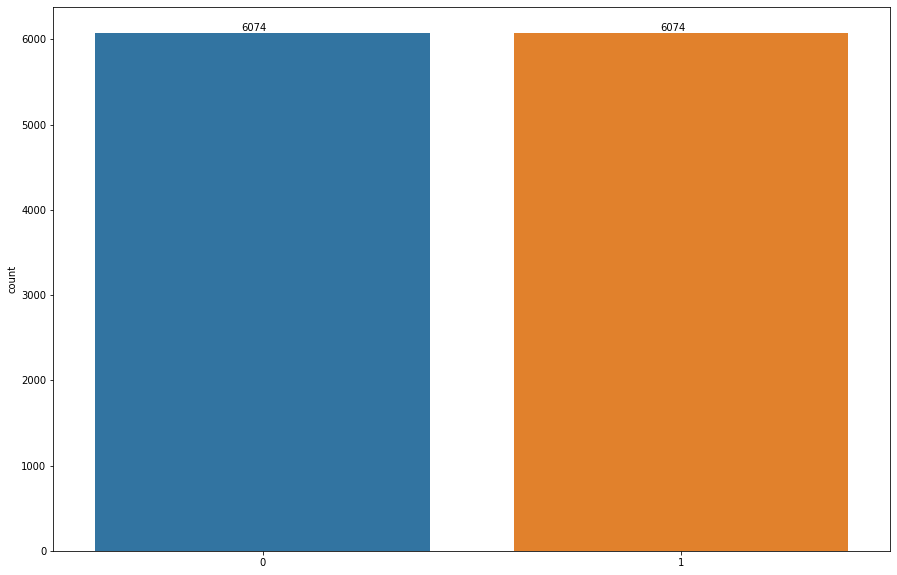

In [60]:
#Decision variable in the dataset is 'y', countplot of the decision variable
plt.figure(figsize=(15,10))
y1_plot=sns.countplot(y_resampled_train)
#To show the count of the respective class on a barplot 
for w in y1_plot.patches:
    y1_plot.annotate(str(w.get_height()), (w.get_x()+0.35, w.get_height()+5), va='bottom', color='black')
plt.show()

In [61]:
Shuffle_df = np.hstack((X_resampled_train, np.array(y_resampled_train).reshape(-1,1)))
np.random.shuffle(Shuffle_df)
X_resampled_train = Shuffle_df[:,:Shuffle_df.shape[1]-1]
y_resampled_train = Shuffle_df[:,-1]

In [24]:
# K=5 fold Cross validation is performed for the MLP Classifier by choosing the hyperparameters above and using it Grid Search CV
kfold = model_selection.KFold(n_splits=5)
model_kfold = MLPClassifier()
parameters = {'activation':['tanh','logistic'], 'solver':['adam'],'max_iter':[(500)],'hidden_layer_sizes':[(30,30,20),(30,30,30)]}

clf=GridSearchCV(model_kfold,parameters,cv=kfold,n_jobs=-1)


In [25]:
#Fitting the model
clf.fit(X_resampled_train,y_resampled_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'logistic'],
                         'hidden_layer_sizes': [(30, 30, 20), (30, 30, 30)],
                         'max_iter': [500], 'solver': ['adam']})

In [26]:
#Creating a dataframe to print the result and sorting the mean test score in descending order
CV=pd.DataFrame(clf.cv_results_).sort_values('mean_test_score',ascending=False)
CV.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,52.653017,1.855967,0.005732,0.000377,tanh,"(30, 30, 20)",500,adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.905761,0.898765,0.911934,0.906134,0.913133,0.907146,0.005137,1
1,52.350330,2.542692,0.006043,0.000636,tanh,"(30, 30, 30)",500,adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.900412,0.899588,0.911523,0.897489,0.909839,0.903770,0.005747,2
2,48.716196,2.959455,0.008882,0.000473,logistic,"(30, 30, 20)",500,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.859259,0.834979,0.854321,0.848909,0.860025,0.851499,0.009170,3
3,40.013298,6.070043,0.006863,0.001729,logistic,"(30, 30, 30)",500,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.838683,0.839918,0.854321,0.852203,0.843145,0.845654,0.006415,4


In [62]:
# Testing accuracies by choosing the best model that we got from the K fold Cross validation method for the whole model
model1 = MLPClassifier(hidden_layer_sizes=(15,30,60,45,30), activation='logistic', solver='adam', max_iter=1000, random_state=47)
model1.fit(X_resampled_train, y_resampled_train) 

MLPClassifier(activation='logistic', hidden_layer_sizes=(15, 30, 60, 45, 30),
              max_iter=1000, random_state=47)

In [63]:
#After being fitted, the model can then be used to predict new values:(Training Accuracy)
yhat = model1.predict(X_original_scaled_test)
yhat_train = model1.predict(X_resampled_train)
yhat [0:5]

array([1., 1., 0., 0., 0.])

In [64]:
cf1 = confusion_matrix(y_original_test, yhat)
print(cf1) 

[[ 312 1194]
 [ 380  114]]


In [65]:
current_test_acc = metrics.accuracy_score(y_original_test, yhat)
print(current_test_acc)

0.213


In [66]:
BER1=0.5*(cf1[0,1]/(cf1[0,0]+cf1[0,1]) + cf1[1,0]/(cf1[1,0]+cf1[1,1]))
BER1

0.7810297272448667

In [67]:
print('Train Accuracy = {} '.format(accuracy_score(y_resampled_train, yhat_train)))
print('Generalization Error on Train = {}'.format(1.0-accuracy_score(y_resampled_train, yhat_train)))
print('Generalization Error on Test = {}'.format(1.0-accuracy_score(y_original_test, yhat)))

Train Accuracy = 0.8393151135989463 
Generalization Error on Train = 0.16068488640105372
Generalization Error on Test = 0.787


In [68]:
df2=pd.read_excel(r'C:\Users\abish\Downloads\520\Project1\IEE520BMI555STUDENTFinalProject2020.xlsx',sheet_name="unlabeled")
df2.head()

,instance,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
0,1,0,0,1,1,1,4,0,0,0,...,749964,41,0,0,126,0.692012,7.39,12.42,5.81,NaN
1,2,3,6,2,8,3,3,1,0,3,...,846197,35,0,0,173,2.548396,4.28,11.79,7.58,NaN
2,3,0,0,0,5,2,0,1,0,2,...,130722,41,0,0,126,2.052980,5.14,11.58,8.96,NaN
3,4,0,3,0,1,2,0,1,0,3,...,934762,28,0,0,126,1.025860,3.90,11.79,5.20,NaN
4,5,4,3,2,8,3,4,0,0,2,...,465653,28,0,0,126,0.798833,4.68,10.15,6.59,NaN


In [53]:
print('The shape of Diabetes Dataset:', df2.shape)

The shape of Diabetes Dataset: (5000, 24)


In [54]:
df2=df2.drop(['y'], axis=1)
df2.head()

,instance,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1,0,0,1,1,1,4,0,0,0,...,123,749964,41,0,0,126,0.692012,7.39,12.42,5.81
1,2,3,6,2,8,3,3,1,0,3,...,82,846197,35,0,0,173,2.548396,4.28,11.79,7.58
2,3,0,0,0,5,2,0,1,0,2,...,104,130722,41,0,0,126,2.052980,5.14,11.58,8.96
3,4,0,3,0,1,2,0,1,0,3,...,91,934762,28,0,0,126,1.025860,3.90,11.79,5.20
4,5,4,3,2,8,3,4,0,0,2,...,141,465653,28,0,0,126,0.798833,4.68,10.15,6.59


In [55]:
X1=df2.loc[:, df2.columns != 'instance']

In [56]:
X1=Scaler.transform(X1)
X1

array([[-0.47192607, -0.98564724, -0.06817979, ...,  2.40354368,
         1.19364137, -1.35919357],
       [ 1.68265954,  0.74725733,  0.7714728 , ..., -0.73627152,
         0.87863124, -0.25508774],
       [-0.47192607, -0.98564724, -0.90783239, ...,  0.1319732 ,
         0.77362787,  0.60574053],
       ...,
       [ 2.40085475,  1.90252704,  0.7714728 , ...,  0.33389057,
        -1.46144398, -0.61688513],
       [ 1.68265954, -0.11919495,  1.6111254 , ..., -1.0997228 ,
        -1.06643128, -1.02234773],
       [-0.47192607, -0.11919495,  0.7714728 , ...,  0.14206907,
         1.05363687, -0.29251506]])

In [57]:
y_prediction = model1.predict(X1)
y_prediction

array([0, 1, 0, ..., 1, 1, 1])

In [58]:
print (y_prediction[:50])

[0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 1 0 0 1 1 0 1 0 1 0 0 1 1]


In [ ]:
#Exporting the results
df_result=pd.DataFrame({"Instance":df2.instance,"Result":y_prediction})
df_result.to_csv("Final_Result.csv", index=False, header=False)